# Ejercicios de precipitación
***

## <font color=steelblue>Exercise 4 - Hypsometric method

<font color=steelblue>Given the hypsometric curve (area-elevation relation) for a catchment, and rainfall datafor several gages within it (file *RainfallData_Exercise_004.xlsx*), compute the average annual precipitation for the basin using the hypsometric method.<tfont>

| **Elevation Range (m)** | **Fraction of Area within Range** |
|-------------------------|-----------------------------------|
| 311-400                 | 0.028                             |
| 400-600                 | 0.159                             |
| 600-800                 | 0.341                             |
| 800-1000                | 0.271                             |
| 1000-1200               | 0.151                             |
| 1200-1400               | 0.042                             |
| 1400-1600               | 0.008                             |

In [2]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
# plt.style.use('dark_background')
plt.style.use('seaborn-whitegrid')

#from scipy.stats import genextreme
#from scipy.optimize import curve_fit

__Hypsometric curve__<br>

It defines the percentage of the area of a catchment that lies below a given altitude.

In this exercise we'll use the hypsometric curve to calculate the proportion of the catchment area at different altitude bands.

In [3]:
# Rangos de altitud
Zs = np.array([311, 400, 600, 800, 1000, 1200, 1400, 1600])
Zs = np.mean([Zs[:-1], Zs[1:]], axis=0)
# Área asociada
As = np.array([0.028, 0.159, 0.341, 0.271, 0.151, 0.042, 0.008])

In [4]:
# crear data frame
hipso = pd.DataFrame(data=[Zs, As]).transpose()
hipso.columns = ['Z', 'A']
hipso['Aac'] = hipso.A.cumsum()
hipso

,Z,A,Aac
0,355.5,0.028,0.028
1,500.0,0.159,0.187
2,700.0,0.341,0.528
3,900.0,0.271,0.799
4,1100.0,0.151,0.950
5,1300.0,0.042,0.992
6,1500.0,0.008,1.000


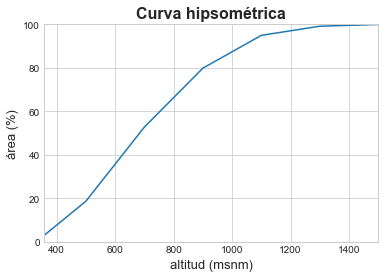

In [5]:
# Gráfico de la curva hipsométrica
plt.plot(hipso.Z, hipso.Aac * 100)
plt.title('Curva hipsométrica', fontsize=16, weight='bold')
plt.xlabel('altitud (msnm)', fontsize=13)
plt.xlim(Zs[0], Zs[-1])
plt.ylabel('área (%)', fontsize=13)
plt.ylim((0, 100));

# guardar la figura
plt.savefig('../output/Ex4_hypsometric curve.png', dpi=300)

__Linear regressión precipitation-altitude__<br>

We will use the precipitation data to calculate the linear dependence of precipitation on altitude. This regression follows the equation:

$$ P = a·Z+b$$

Where $P$ is mean annual precipitation (mm) at a point with altitude $Z$ (m.a.s.l).

In [6]:
# Importar datos de precipitación
data4 = pd.read_excel('../data/RainfallData.xlsx', sheet_name='Exercise_004',
                      index_col='Gage')
# Simplificar nombres de las variables
data4.columns = ['Z', 'P']
data4

,Z,P
Gage,,
1,442,1392
2,548,1246
3,736,1495
4,770,1698
5,852,1717
6,1031,1752


In [7]:
# ajustar la recta de regresión
(a, b) = np.polyfit(data4.Z, data4.P, deg=1)
print('P = {0:.3f} Z + {1:.3f}'.format(a,b))

P = 0.841 Z + 936.550


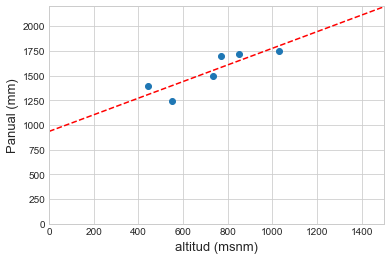

In [8]:
# Gráfico altitud vs precipitación anual
plt.scatter(data4.Z, data4.P)
# recta de regresión
xlim = np.array([0, Zs[-1]])
plt.plot(xlim, a * xlim + b, 'r--')
# configuración
plt.title('', fontsize=16, weight='bold')
plt.xlabel('altitud (msnm)', fontsize=13)
plt.xlim(xlim)
plt.ylabel('Panual (mm)', fontsize=13)
plt.ylim(0, 2200);

# guardar la figura
plt.savefig('../output/Ej4_regresión lienal Z-Panual.png', dpi=300)

__Areal precipitation__

We will use the above linear regression to estimate the mean annual precipitation for each of the altitude bands. Areal precipitation is the weighted mean of these precipitation values, where the weights are the percentages of catchment area belonging to the elevation bands.

In [9]:
hipso['P'] = a * hipso.Z + b
hipso

,Z,A,Aac,P
0,355.5,0.028,0.028,1235.359775
1,500.0,0.159,0.187,1356.817066
2,700.0,0.341,0.528,1524.924043
3,900.0,0.271,0.799,1693.031019
4,1100.0,0.151,0.950,1861.137996
5,1300.0,0.042,0.992,2029.244973
6,1500.0,0.008,1.000,2197.351949


La precipitación areal es el sumatorio del producto del área y precipitación en cada uno de los rangos de altitud.

In [14]:
Pareal = np.sum(hipso.A * hipso.P)

print('La precipitación media anual sobre la cuenca es {0:.1f} mm'.format(Pareal))

La precipitación media anual sobre la cuenca es 1613.0 mm


Hacer lo mismo de forma simplificada:

In [17]:
p = np.polyfit(data4.Z,  data4.P, deg=1) # ajustar la regresión
Ps = np.polyval(p, Zs)                   # interpolar precipitación
Pareal = np.sum(Ps * As)                 # precipitación areal

print('La precipitación media anual sobre la cuenca es {0:.1f} mm'.format(Pareal))

La precipitación media anual sobre la cuenca es 1613.0 mm


Si se hubiera calculado la precipitación areal por el **método de la media de las estacions**, habríamos subestimado la precipitación areal de la cuenca.

In [19]:
Pareal2 = data4.P.mean()

print('La precipitación media anual sobre la cuenca {0:.1f} mm'.format(Pareal2))

La precipitación media anual sobre la cuenca 1550.0 mm
